# Welcome to the `pysan` development notebook
This colab notebook is currently being tested as a workspace to develop new features. Code below is not deployment-ready, and is meant purely as a transparent way to see what kinds of features are in the works.

Note: this notebook is meant to be run on your local system after cloning the repository.

In [1]:
import sys
sys.path.insert(1,'../../')
import pysan as ps

pysan ready


## Development Area
If the output of the previous cell reads `pysan ready.`, then everything is working and you're ready to go. Remember to leave lots of comments (and docstrings) so that anyone reading this page can understand what's going on!

In [2]:
import matplotlib.pyplot as plt

plt.style.use('pysan.mplstyle')

sequence = ps.generate_sequence(50, [1,2,3,4,5])
#sequence = ['A','A','B','A','A','C','C','C','A','B','A','A']


{'length': 50, 'alphabet': {1, 2, 3, 4, 5}, 'sequence_universe': 88817841970012523233890533447265625, 'unique_bigrams': 20, 'bigram_universe': 25}
{1: 13, 2: 8, 3: 10, 4: 11, 5: 8} <module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>


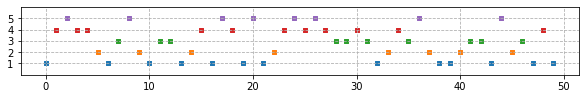

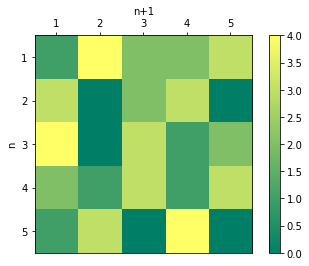

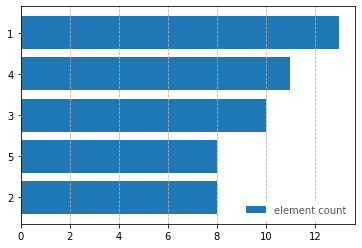

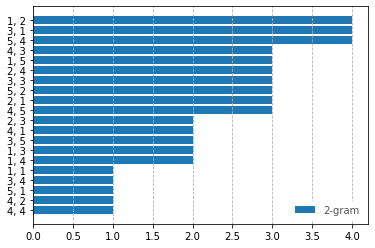

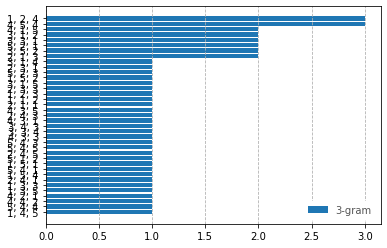

In [3]:
ps.full_analysis(sequence)

In [4]:
longest = ps.get_longest_spell(sequence)
display(longest)

{'element': 4, 'count': 2, 'start': 3}